In [4]:
import pandas as pd
import scipy.spatial.distance as sci_dist
from PIL import Image
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.path import Path
import os
import sys

tools_path = '../helperScripts/tools.py'

sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools

Image.MAX_IMAGE_PIXELS = None
np.random.seed(0)
matplotlib.rcParams['pdf.fonttype'] = 42

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
# data_folder = '/Users/yaelheyman/RajLab Dropbox/Yael Heyman/SpatialBarcodes/ImagingData/2024-02-27_spatialbarcodes_SG_expression/projects/2024-02-27_spatialbarcodes_expression/roi_2/exports/processedData/'
data_folder  = tools.roi_file_paths['dish_roi2']['out_path']

clustered = pd.read_csv('../extractedData/in_vitro/overlap_results_by_threshold_cluster_all_rois_sc_algo_median.csv')
unclustered = pd.read_csv('../extractedData/in_vitro//overlap_results_by_threshold_unclustered_all_rois_sc_algo.csv')
# clustered_roi2 = pd.read_csv(data_folder + '/overlap_results_by_threshold_cluster_roi2_sc_algo.csv')
# unclustered_roi2 = pd.read_csv(data_folder + '/overlap_results_by_threshold_unclustered_roi2_sc_algo.csv')

plot_output_folder = '../graphs'

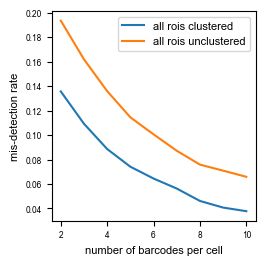

In [5]:
width_in = 7 / 2.54
height_in = 7 / 2.54

# Create figure of size 6 cm by 6 cm
fig, ax = plt.subplots(figsize=(width_in, height_in))
p1, = plt.plot(clustered["Threshold"], clustered["FractionAboveThreshold"], label="all rois clustered")
p2, = plt.plot(unclustered["Threshold"], unclustered["FractionAboveThreshold"], label="all rois unclustered")
# p3, = plt.plot(clustered_roi2["Threshold"], clustered_roi2["FractionAboveThreshold"], label="roi2 clustered")
# p4, = plt.plot(unclustered_roi2["Threshold"], unclustered_roi2["FractionAboveThreshold"], label="roi2 unclustered")

ax.legend(fontsize=8,loc='upper right')  # Automatically uses the labels provided in the plot calls
plt.xlabel("number of barcodes per cell", fontsize = 8)  # Optionally add axis labels
plt.ylabel("mis-detection rate", fontsize = 8)
ax.tick_params(axis='both', which='major', labelsize=6)
# plt.title("Comparison of Fraction Above Threshold for Clustered and Unclustered ROIs")
plt.tight_layout()
plt.savefig(plot_output_folder+ '/fraction overlap clustered vs un clustered.pdf')
plt.show()
